## Test a Perceptual Phenomenon

#### Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

##### Questions For Investigation

As a general note, be sure to keep a record of any resources that you use or refer to in the creation of your project. You will need to report your sources as part of the project submission.
1. What is our independent variable? What is our dependent variable?

2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

Now it’s your chance to try out the Stroop task for yourself. Go to this [link](https://www.google.com/url?q=https://faculty.washington.edu/chudler/java/ready.html&sa=D&ust=1498830894332000&usg=AFQjCNFfl_C3ANETCZ5wGxOFdntc4vYESA), which has a Java-based applet for performing the Stroop task. Record the times that you received on the task (you do not need to submit your times to the site.) Now, download this [dataset](https://www.google.com/url?q=https://drive.google.com/file/d/0B9Yf01UaIbUgQXpYb2NhZ29yX1U/view?usp%3Dsharing&sa=D&ust=1498830894332000&usg=AFQjCNEub68BDcZWfpQYjgCAevkwVWu0Eg) which contains results from a number of participants in the task. Each row of the dataset contains the performance for one participant, with the first number their results on the congruent task and the second number their performance on the incongruent task.

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

stroop_df = pd.read_csv('stroopdata.csv')
stroop_df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [130]:
stroop_df['C - I'] = stroop_df['Congruent'] - stroop_df['Incongruent']
stroop_df.head()

,Congruent,Incongruent,C - I
0,12.079,19.278,-7.199
1,16.791,18.741,-1.950
2,9.564,21.214,-11.650
3,8.630,15.687,-7.057
4,14.669,22.803,-8.134


### 1. What is our independent variable? What is our dependent variable?

Independent - Word Condition (Congruent or Incongruent)  
Dependent   - Response Time in seconds

### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

The null hypothesis should be that the mean time for colour recognition for congruent words is equal to or greater than the mean time for incongruent words, therefore implying a one-tailed test. 

The alternative hypothesis should be that the congruent words mean is less than the incongruent words mean.

$$H_{0}: μ_{C} ≥ μ_{I}$$

$$H_{A}: μ_{C} < μ_{I}$$

where **μ** is a population mean, the subscript **"C"** represents the congruent words condition, and the subscript **"I"** represents the incongruent words.

A *one-tailed*, dependent samples t-test comparing the difference in means (the time to name the ink colors for congruent words and incongruent words) should be performed. With this test, we want to determine whether there is enough evidence in the provided sample of data to infer that the congruent words mean colour recognition time is less than the incongruent words mean colour recognition time for the entire population and not just the sample data.

A **t-test** is appropriate because the population variance is unknown and the sample size is less than 30. When the sample size is less than 30, the sample data no longer approximate a normal distribution, which makes the use of a **Z-value** inappropriate. The following assumptions are required for t-tests for dependent means:

- Interval or ratio scale of measurement (approximately interval)
- Random sampling from a defined population
- Samples or sets of data used to produce the difference scores are linked in the population through repeated measurement, natural association, or matching
- Scores are normally distributed in the population; difference scores are normally distributed

A one-tailed test is appropriate under the assumption that incongruent word conditions will not improve recognition times, which is intuitive. The one-tailed test allows for a more scrutinous examination of the negative impact of incongruent word conditions on recognition times.

The t-test should be of the dependent samples variety because the same subject is exposed to two conditions and tested for each, which are the defining criteria for "within-subjects" or "repeated-measures" statistical tests.

### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [131]:
stroop_df.describe(include='all')

,Congruent,Incongruent,C - I
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,-7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,-21.919000
25%,11.895250,18.716750,-10.258500
50%,14.356500,21.017500,-7.666500
75%,16.200750,24.051500,-3.645500
max,22.328000,35.255000,-1.950000


In [132]:
stroop_df.median()

Congruent      14.3565
Incongruent    21.0175
C - I          -7.6665
dtype: float64

In [133]:
stroop_df.var()

Congruent      12.669029
Incongruent    23.011757
C - I          23.666541
dtype: float64

In [134]:
stroop_df.sem()

Congruent      0.726551
Incongruent    0.979195
C - I          0.993029
dtype: float64

### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

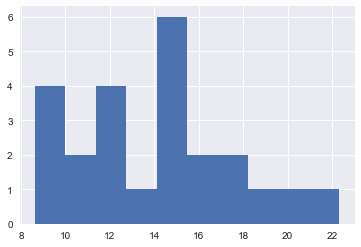

In [150]:
stroop_df['Congruent'].hist()
plt.show()

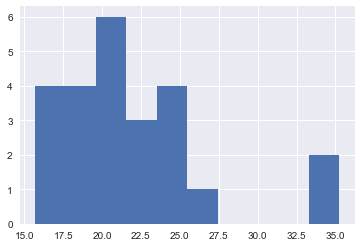

In [151]:
stroop_df['Incongruent'].hist()
plt.show()

In [136]:
stroop_df['Subject'] = stroop_df.index+1
stroop_df.head()

,Congruent,Incongruent,C - I,Subject
0,12.079,19.278,-7.199,1
1,16.791,18.741,-1.950,2
2,9.564,21.214,-11.650,3
3,8.630,15.687,-7.057,4
4,14.669,22.803,-8.134,5


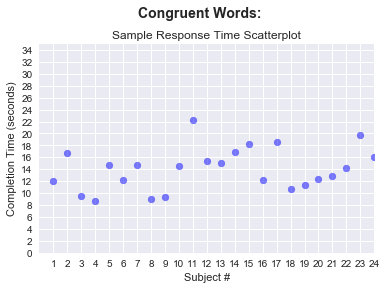

In [137]:
N = len(stroop_df)
x = stroop_df['Subject']
y = stroop_df['Congruent']
colors = 'blue'
area = np.pi * 15 # 0 to 15 point radiuses

fig = plt.figure()
fig.suptitle('Congruent Words: ', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('Sample Response Time Scatterplot')
ax.set_xlabel('Subject #')
ax.set_ylabel('Completion Time (seconds)')

plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.yticks(np.arange(0, 35, 2))
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.ylim([0,35])
plt.xlim([0,24])
plt.show()

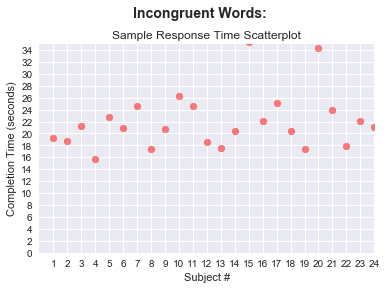

In [138]:
N = len(stroop_df)
x = stroop_df['Subject']
y = stroop_df['Incongruent']
colors = 'red'
area = np.pi * 15 # 0 to 15 point radiuses

fig = plt.figure()
fig.suptitle('Incongruent Words: ', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('Sample Response Time Scatterplot')
ax.set_xlabel('Subject #')
ax.set_ylabel('Completion Time (seconds)')

plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.yticks(np.arange(0, 35, 2))
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.ylim([0,35])
plt.xlim([0,24])
plt.show()

The congruent words sample has a distribution which is between 8 and 22 seconds and has a lower average completion time compared to the incongruent words scatterplot which shows the distibtuion is between 15 to about 26 seconds with what appears to be one outlier at 35 seconds. The average completion time is definitely higher.

### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

Confidence Level = 90%  
t-critical value (2-sided test) -> from [t-table](https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg)  
df = n - 1 = 24  
$$t_{critical} =  +- 1.711$$

In [145]:
# number of subjects in the sample
n = len(stroop_df)
n

24

In [146]:
# point estimate of μi - μc -> PE (in seconds)
PE = stroop_df['Incongruent'].mean() - stroop_df['Congruent'].mean()
round(PE,2)

7.96

In [147]:
#s - sample standard deviation of differences

#1. D = sample difference
stroop_df['D'] = stroop_df['Incongruent'] - stroop_df['Congruent']

#2. DFM = difference from the mean, SQD = squared differences from the mean
DFM = stroop_df['D'] - stroop_df['D'].mean()
stroop_df['SQD'] = DFM*DFM

#3. SSD = sum of squared differences
SSD = stroop_df['SQD'].sum()

#4. v = variance = SSD/(n-1)
v = SSD/(n-1)

#5. s = sqrt(v)
from math import *
s = sqrt(v)
round(s,2)

4.86

In [148]:
# t-statistic
# t = PE/(s/√n)
# PE = (μi - μc)
t = PE/(s/(sqrt(n)))
round(t,4)

8.0207

t-statistic > t-critical  
8.0207 > 1.711

#### Conclusion:

Null Hypothesis which states that there is no significant differences between the population average completion time for the two different conditions (Congruent & Incongruent) is **rejected**. In theory, if we were able to calculate the average difference of every single person who took this pair of tests (the population) we expect there would be a significantly slower or significantly faster time in either the the incongruent or congruent condition.

#### 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect?

The brain has an image association between the shape of the word and the colour. When there is a mismatch, additional time is necessary for the prefrontal cortex to process the information and decide on its context.

A similar effect would likely be observed if the participants were shown words of the correct colour but the wrong text.I think the difference could be lesser because the visual colour representation could be more ingrained in the brain than word shape.

### References
- [Stat Trek: Student's t Distribution](http://stattrek.com/probability-distributions/t-distribution.aspx)
- [Emory Psychology: Test Assumptions](http://www.psychology.emory.edu/clinical/bliwise/Tutorials/TOM/meanstests/assump.htm)
- [Laerd Statistics: Dependent T-Test for Paired Samples](https://statistics.laerd.com/statistical-guides/dependent-t-test-statistical-guide.php)
- [Wikipedia: Numerical Stroop effect](https://en.wikipedia.org/wiki/Numerical_Stroop_effect)